In [55]:
pip install pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import cv2
import os
import re
#from pdf2image import convert_from_path
from wand.image import Image as WandImage
from PyPDF2 import PdfReader

from colorama import Fore, Back, Style
import os
import os.path
import numpy as np
import pandas as pd
import fitz  # PyMuPDF
import io
from PIL import Image, ImageDraw, ImageFont
from PIL import Image, ImageFilter
from xlsxwriter import workbook
import pandas as pd
from pandas import ExcelWriter
import openpyxl as xl
import glob
import os
import openpyxl
from numpy import asarray
from openpyxl import load_workbook
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random
from itertools import groupby
from operator import itemgetter

pytesseract.pytesseract.tesseract_cmd = r"C:\Users\maxik\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
#pytesseract.pytesseract.tesseract_cmd = 'C:\\Users\\maxik\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

In [3]:
def increase_resolution(input_path, output_path, scale_factor):
    with WandImage(filename=input_path) as img:
        # Set resolution
        img.resolution = (img.width * scale_factor, img.height * scale_factor)
        # Save the high-resolution image
        img.save(filename=output_path)
def sharpen_image(input_path, output_path, factor=2):
    # Open the image
    image = Image.open(input_path)

    # Apply the sharpen filter
    sharpened_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=factor, threshold=1))

    # Save the sharpened image
    sharpened_image.save(output_path)
def crop_item(dir, Le_Up_Ri_Lo, root_dir, left=0, upper=120, right=2000, lower=1000):
    image = Image.open(dir)  # Replace with the path to your image
        
    # except:
    #     print(dir+" erro failed to read")
    #     return 1
    # Define the coordinates of the rectangle you want to crop (left, upper, right, lower)
    list_filename = dir.split('.')
    filename=list_filename[0]+".png"
    #^ nuron network to identify cordinates of a data frame rectangle, 
    # Crop the image
    if((image.width == right-left and image.width == lower-upper) or "193387509182y0198y09812y5398012r098y2103891y9fd34" in filename):
        return filename
    cropped_image = image.crop((left, upper, right, lower))
    filename=list_filename[0]+"193387509182y0198y09812y5398012r098y2103891y9fd34"+".png"
    # Save the cropped image
    cropped_image.save(filename)
    return filename
def detect_horizontal_lines(img_array, threshold=0.95):
    # Calculate the sum of pixel values along each row
    row_sums = np.sum(img_array, axis=1)

    # Detect horizontal lines by finding rows with pixel sums exceeding the threshold
    horizontal_lines = np.where(row_sums >= threshold * img_array.shape[1])[0]
    
    return horizontal_lines

def smart_crop(image_path, output_path):
    # Open the image and convert it to grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Detect and exclude horizontal lines
    horizontal_lines = detect_horizontal_lines(img_array)
    if len(horizontal_lines) > 0:
        # Exclude horizontal lines by adjusting the image array
        img_array = np.delete(img_array, horizontal_lines, axis=0)

    # Identify columns with text by summing up pixel values along each column
    column_sums = np.sum(img_array, axis=0)

    # Find the first and last columns with non-zero pixel sum (indicating text)
    first_column = np.argmax(column_sums > 0)
    last_column = len(column_sums) - np.argmax(np.flip(column_sums) > 0)

    # Find the first row with non-zero pixel sum
    first_row = 0
    try:
        while True:
            if(np.sum(img_array[first_row])==0):
                break
            first_row += 1
    except:
        pass
    # Find the last row with non-zero pixel sum
    last_row = img_array.shape[0] - 1
    try:
        while np.sum(img_array[last_row]) == 0:
            last_row -= 1
            if(last_row == -1):
                break
    except:
        pass
    # Crop the image using the identified boundaries
    #cropped_img = img.crop((first_column, 0, last_column, 100)) #first_row
    cropped_img = img.crop((first_row, first_column, -last_row, last_column))
    # Save the cropped image
    #cropped_img.save(output_path)
    
    return cropped_img


def pdf_to_image_array(pdf_path, output_image_path, page_number=0):
    output_filename = output_image_path.split(".")
    output_filename = output_filename[0] + "v6"+".png"
    print(output_filename)
    pdf_document = fitz.open(pdf_path)
    page = pdf_document[page_number]
    zoom = 4    # zoom factor
    mat = fitz.Matrix(zoom, zoom)
    image = page.get_pixmap(matrix = mat)
    
    
    # Save the image to the specified path

    image.save(output_filename, "PNG")
    # Close the PDF document
    #pdf_document.close()



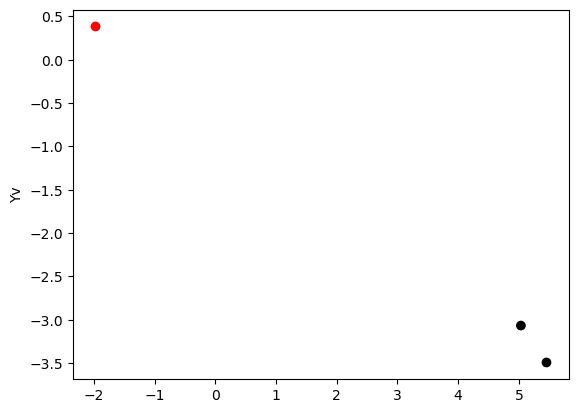

In [11]:
a = np.array([
    [5.033, -3.066],
    [5.454, -3.492],
    [-1.971, 0.384]
])

x, y = a.T

# Assign colors (one color per point)
colors = ["black", "black", "red"]

# Scatter plot
plt.scatter(x, y, color=colors)
plt.ylabel('Yv')
plt.show()

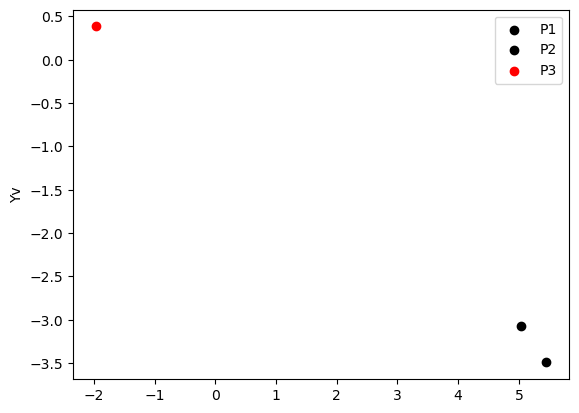

In [12]:
# Example data points (same as before)
x, y = a.T

# Creating colors and class names beforehand
colors = ["black", "black", "red"]
classes = ["P1", "P2", "P3"]

# Scatter plot with legends
for x_per_class, y_per_class, color, label in zip(x, y, colors, classes):
    plt.scatter(x=x_per_class, y=y_per_class, color=color, label=label)

plt.legend()
plt.ylabel('Yv')
plt.show()


In [1]:
from itertools import groupby
from operator import itemgetter

data = [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14]

for k, g in groupby(enumerate(data), lambda ix: ix[0] - ix[1]):
    consecutive_numbers = list(map(itemgetter(1), g))
    print(consecutive_numbers)
    

[1, 2, 3, 4]
[7, 8]
[10, 11, 12, 13, 14]


In [3]:
def flashfill(x_seed, y_seed, img_path, color=(255, 255, 255, 255)):
    img = Image.open(img_path)
    img1 = img.convert("RGB") 
    # Create an ImageDraw object
    # Perform flood fill
    ImageDraw.floodfill(img,(x_seed, y_seed), color)
    cv2.imshow('flash', asarray(img))
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
    return np.array(img)
def relative_flushFlood(img_path,relative_big_lines):
    output_path = img_path.split()
    output_path1 = output_path[0]+str(random.randint(0, 100)) + ".png"
    img = Image.open(img_path)
    i=0
    while(i<= 100):
        x=random.randint(0, img.width)
        try:
            y=relative_big_lines[random.randint(0, len(relative_big_lines))]
        except:
            y=img.height
        try:
            if(img.getpixel((x,y)) == (0,0,0,0)):
                pass
            else:
                modimg = Image.fromarray(flashfill(x, y, img_path), 'RGB')
                modimg.save(img_path)
                img=modimg
        except:
            pass
        i+=1
    return np.array(img)
def precent(img_array):
    viritile_lines = []
    column_sums = []
    column_sums = (np.sum(img_array, axis=0))
    virticle_counter = 0
    column_sums=list(column_sums)
    try:
        column_sums = [item for arr in column_sums for item in arr.tolist()]
    except:
        pass
    #print(img_array)
    #print(column_sums)
    for i in column_sums:
        if (i == min(column_sums)):
            indices = np.where(column_sums == i)[0]
            viritile_lines.extend(indices)
            virticle_counter+=1
    try:
        precentage_virticle_white = (virticle_counter/len(column_sums)) *100
    except:
        precentage_virticle_white = 100
    return precentage_virticle_white
def margin_detect_verticle_lines(img_array, threshold=0.99):
    # Calculate column sums
    column_sums = np.sum(img_array, axis=0)
    
    # Sort indices based on column sums
    sorted_indices = np.argsort(column_sums)
    
    # Threshold for significant vertical lines
    threshold_value = threshold * max(column_sums)
    
    # Initialize lists for detected lines
    vertical_lines = []
    large_lines = []
    
    for i in column_sums:
        if i >= threshold_value:
            indices = np.where(column_sums == i)[0]
            vertical_lines.extend(indices)
            
            # Check for large lines (you can adjust this condition)
            if len(indices) > 10:  # Example: consider lines wider than 10 pixels
                large_lines.extend(indices)
    
    # Calculate percentage of significant vertical white space
    try:
        percentage_vertical_white = (len(vertical_lines) / len(column_sums)) * 100
    except ZeroDivisionError:
        percentage_vertical_white = 0
    vertical_lines=set(vertical_lines)
    vertical_lines=list(vertical_lines)
    vertical_lines.sort()
    relative_verticle_lines = []
    for k, g in groupby(enumerate(vertical_lines), lambda ix: ix[0] - ix[1]):
        consecutive_numbers = list(map(itemgetter(1), g))
        #print(consecutive_numbers)
        relative_verticle_lines.append(int(sum(consecutive_numbers)/len(consecutive_numbers)))
    return relative_verticle_lines, large_lines, percentage_vertical_white
def is_image_black(img):
    return not img.getbbox()
def smart_crop_relative(image_path, output_path):
    list_filename = image_path.split('.')
    list_filename2=list_filename[0]+"cropped\\"
    os.makedirs(list_filename2, exist_ok=True)
    img1= Image.open(image_path).convert('L')
    img = img1
    img_array = np.array(img)
    (relative_verticle_lines, relative_big_lines, precentage) = margin_detect_verticle_lines(img_array)
    img = Image.fromarray(relative_flushFlood(image_path, relative_big_lines))
    # relative_verticle_lines=set(relative_verticle_lines)
    # relative_verticle_lines=list(relative_verticle_lines)
    # relative_verticle_lines.sort()
    print(relative_verticle_lines)
    if(len(relative_verticle_lines) > 0):
        left = []
        right = []
        rr = 0
        ll = 0
        #relative_verticle_lines.sort()
        for rr in relative_verticle_lines:
            up = 0
            bottom = 1000
                #img = img.resize((right, img.height))
            if(ll>=rr):
                ll=0
                if(ll>=rr):
                    rr=20
            if(rr>=img.width):
                new_image = Image.new(img.mode, (img.width+(rr-img.width), img.height))
                new_image.paste(img, (0, 0))
                img=new_image
                # else:
                #     new_image = Image.new(img.mode, (img.width+(img.width-rr), img.height))

    # Paste the original image onto the new canvas
            cropped_image = img.crop((ll, up, rr, bottom))
            numpyarrCrppedimg=np.array(cropped_image)
            value = precent(numpyarrCrppedimg)
            value= int(value)
            print(":value::", value)
            if(rr >= cropped_image.width):
                new_image = Image.new(img.mode, (cropped_image.width+(rr-cropped_image.width), cropped_image.height))

                new_image.paste(cropped_image, (0, 0))
                cropped_image=new_image
            if(value<=90):
                filename=list_filename2+str(rr)+".png"
                cropped_image.save(filename)
                #display(cropped_image)
            try:
                cv2.imshow('Croppped img', asarray(cropped_image))
            except:
                pass
        # Break the loop if 'q' key is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            try:
                cv2.imshow('img', asarray(img))
            except:
                pass
        # Break the loop if 'q' key is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            if(is_image_black(cropped_image)):
                break
    cv2.destroyAllWindows()
    return list_filename[0]+"cropped\\"


In [1]:
dir1 = r"C:\Users\maxik\Documents\GitHub\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg\WNB-PUCD6-DH-1229v6.png"
dir=crop_item(dir1, 0, dir1)
if(dir==1):
    print("crash")
#dir=r"C:\Users\maxik\Documents\GitHub\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg\WNB-PUCD6-DH-1229v6193387509182y0198y09812y5398012r098y2103891y9fd34.png"
if(smart_crop_relative(dir,dir) != 1): 
    cropped_images = smart_crop_relative(dir, dir)
else:
    print()
print(cropped_images)
cropped_images = smart_crop_relative(dir, dir)
file_list_cropped = os.listdir(cropped_images)
print(cropped_images)
output_dirs = []
for i in file_list_cropped:
    print("start")
    print(file_list_cropped)
    print(cropped_images)
    print(i)
    i=cropped_images+"\\"+i
    if(smart_crop_relative(i,i) != 0): output_dirs.append(smart_crop_relative(i,i))
output_dirs2 = []
for j in output_dirs:
    file_list_cropped = os.listdir(j)
    for i in file_list_cropped:
        i=j+i
        if(smart_crop_relative(i,i) != 0): output_dirs2.append(smart_crop_relative(i,i))
# if cropped_images:
#     for idx, cropped_img in enumerate(cropped_images):
#         cropped_img.show()
# else:
#     print("No valid cropped images.")


# sharpen_image(dir, dir, 2)
# print(dir)
# crop_item
# image = Image.open(dir)  # Replace with the path to your image
# custom_config = r'--oem 3 --psm 2'
# print("error")
# # Use pytesseract with custom configuration
# text_colums = pytesseract.image_to_string(image)
# print("error")
# custom_config = r'--psm 6'  # Horizontal text mode
# text_lines = pytesseract.image_to_string(image, config=custom_config)
# for i in text_lines:
#     if(i=="\n" and (text_lines[text_lines.index(i)-1]=="\n" or text_lines[text_lines.index(i)-1]==" ")):
#         text_lines[text_lines.index(i)]=""
# for i in text_colums:
#     if(i=="\n" and (text_colums[text_colums.index(i)-1]=="\n" or text_colums[text_colums.index(i)-1]==" ")):
#         text_colums[text_colums.index(i)]=""

#     #creats lists
# text_rows_inline = text_lines.split("\n")
# text_colums_nline = text_colums.split("\n")
# rows2, cols2 = (len(text_colums_nline)), (len(text_rows_inline))
# print(text_colums)
    



NameError: name 'crop_item' is not defined

In [80]:

def PrecentageMatch(string1, string2):
    precetage_count = 0
    for i in range(len(string1)):
        #print(string1)
        #print(string2)
        try:
            if(string1[i] == string2[i]):
                precetage_count=+1
        except:
            precetage_count= precetage_count

    if(precetage_count!=0):
        return precetage_count/len(string1)*100
    return 0
def Compare(string1, string2):
    '''
    Compares two lists in a loop. Once the lists do not
    match retures charater of lists that do not match.
    '''

    for i in range(len(string1)):
        try:
            if(string1[i] != string2[i]):
                return string1
        except:
            pass
    return "error"
def match_join(string1, string2):
    #print(string1)
    #print(string2)
    try:
        string1_list = string1.split()
    except:
        print(" ")
        #print("except_string1")
    try:
        string2_list = string2.split()
    except:
        #print("excelption_string2")
        print(" ")
    bitmap_append = []
    output_string = " "
    for i in range(len(string1_list)):
        try:
            if(string1_list[i] == string2_list[i]):
                bitmap_append.append(1)
            else:
                bitmap_append.append(0)
        except:
            bitmap_append.append(0)
    for j in range(len(bitmap_append)):
        try:
            if(bitmap_append[j]==1):
                output_string = output_string+string2_list[j]
        except:
            pass
    return output_string
def create_scv(dir, filename_out, data_list):
    #data frame
    filename_outC = dir+filename_out+".cvs"
    filename_outX = dir+filename_out+".xlsx"
    df = pd.DataFrame(data_list)
    print(filename_outX)
    display(df)
    df.to_excel(filename_outX)
    #df.to_csv(filename_outC)
def pytesseractRead(dir, output_dir, sizeofDataframeROWSCOLS):
    sharpen_image(dir, dir, 2)
    print(dir)
    image = Image.open(dir)  # Replace with the path to your image
    custom_config = r'--oem 3 --psm 14'

# Use pytesseract with custom configuration
    text_colums = pytesseract.image_to_string(image, config=custom_config)
    custom_config = r'--psm 6'  # Horizontal text mode
    text_lines = pytesseract.image_to_string(image, config=custom_config)
    for i in text_lines:
        if(i=="\n" and (text_lines[text_lines.index(i)-1]=="\n" or text_lines[text_lines.index(i)-1]==" ")):
            text_lines[text_lines.index(i)]=""
    for i in text_colums:
        if(i=="\n" and (text_colums[text_colums.index(i)-1]=="\n" or text_colums[text_colums.index(i)-1]==" ")):
            text_colums[text_colums.index(i)]=""

    #creats lists
    text_rows_inline = text_lines.split("\n")
    text_colums_nline = text_colums.split("\n")
    rows, cols = sizeofDataframeROWSCOLS
    rows2, cols2 = (len(text_colums_nline)), (len(text_rows_inline))
    print(text_colums)
    datalistdf = [[[]]*(rows+rows2)]*(cols+cols2)
    for elementSTR in text_colums_nline:
        for linestr in text_rows_inline:
            for i in linestr:
                if(elementSTR not in linestr):
                    break
                try:
                    if(elementSTR[0]==i):
                        pass
                except:
                    break
                if(elementSTR[0]==i):
                    #print(elementSTR)
                    if(Compare(linestr, elementSTR)!=int and Compare(linestr, elementSTR) != "error"):
                        try:
                            buffer = Compare(linestr, elementSTR)
                            if(PrecentageMatch(buffer, elementSTR)>=0.00):
                                print(PrecentageMatch(buffer, elementSTR)+elementSTR)
                                if(text_colums_nline.index(elementSTR) > cols):
                                    #print("element"+text_rows_inline.index(linestr)+","+text_colums.index(elementSTR))
                                    #datalistdf[text_rows_inline.index(linestr)].append(elementSTR)
                                    if(text_colums_nline.index(elementSTR) > cols):
                                        try:
                                            datalistdf[text_colums_nline.index(elementSTR)]
                                        except:
                                            pass
                                            #pytesseractRead(dir, output_dir, (1, text_colums_nline.index(elementSTR)))
                                elif(text_colums_nline.index(elementSTR) != 0 or text_colums_nline.index(elementSTR) < cols):
                                    #print("element"+(text_rows_inline.index(linestr),text_colums.index(elementSTR)))
                                    datalistdf[text_rows_inline.index(linestr)][text_colums.index(elementSTR)]=(elementSTR)
                            else:
                                #print("error:::"+PrecentageMatch(buffer, elementSTR))
                                pass
                            break
                        except:
                            pass
                            #print("error in match sector")
    #iterates through lists, # -> | & -->  r, w, 
    #print(datalistdf)
    # for i in text_rows_inline:
    #     for j in text_colums_nline:
    #         for k in j:
    #             try:
    #                 if(PrecentageMatch(j,i) !=0):
    #                     print(j)
    #                     #print("match::"+match_join(j,i))
    #                     datalistdf[text_colums_nline.index(j)][text_rows_inline.index(i)]=match_join(i,j)
    #             except:
    #                 print("except")
    #                 pass
    text_rows_inline
    #print(datalistdf)
    filename = output_dir.split("\\")
    try:
        create_scv(dir, filename[-1], datalistdf)
    except:
        create_scv(dir, filename[0], datalistdf)
    return 0



In [78]:
dirrrrrrrrrrrrrrrrrin=r"C:\Users\maxik\Documents\GitHub\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg\WNB-PUCD6-DH-1229v6193387509182y0198y09812y5398012r098y2103891y9fd34.png"
pytesseractRead(dirrrrrrrrrrrrrrrrrin,dirrrrrrrrrrrrrrrrrin, (0,0))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\maxik\\Documents\\GitHub\\Nuron-text-recognition\\WNB-PUCD6-DH-1432-jdg\\WNB-PUCD6-DH-1229v6193387509182y0198y09812y5398012r098y2103891y9fd34.png'

In [83]:

def itr_dir(dir, extension, jdg_dir=r"C:\Users\maxik\Documents\Github\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg"):  # Replace with your desired file extension
    # List all files in the directory

    # Filter files by the specified extension
    # Print the filtered file list
    try:
        file_list = os.listdir(jdg_dir)
        filtered_files = [file for file in file_list if file.endswith(".png")]
    except:
        file_list = []
        filtered_files = []
    if(len(file_list) != 0 and len(filtered_files)!=0):
        file_list = os.listdir(jdg_dir)
        filtered_files = [file for file in file_list if file.endswith(".png")]
        if(len(filtered_files) == 0):
            return 1
        print("hello!")
        for file in filtered_files:
            dir_fle = ""
            print("hello")
            dir_file = jdg_dir+'\\'+file
            list_filenames = file.split('.')
            print('extrancting')
            output_dir = crop_item(dir_file, 0, jdg_dir)
            if(output_dir != 1):
                print("crop")
                print(output_dir)
                pytesseractRead(output_dir, dir, (0,0))
        return 3
    else:
        file_list = os.listdir(dir)
        filtered_files = [file for file in file_list if file.endswith(extension)]
        os.makedirs(jdg_dir, exist_ok=True)
        for file in filtered_files:
            dir_file = ""
            dir_file = dir+'\\'+file
            list_filenames = file.split('.')
            dir_filejpg = ""
            dir_filejpg = jdg_dir+'\\'+file
            if(list_filenames[-1] == "pdf"):
                    #pdf_to_jpg(dir_file, dir)
                    #extract_text_from_column(dir_file, 0)
                pdf_to_image_array(dir_file, dir_filejpg)
                #print(dir_file)
        return 2
input_dir=r"C:\Users\maxik\Documents\GitHub\Nuron-text-recognition\WNB-PUCD6-DH-1432"
jdg_dir = r"C:\Users\maxik\Documents\Github\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg"
if(itr_dir(input_dir, ".pdf") == 2):
    itr_dir(input_dir, ".pdf")

hello!
hello
extrancting
crop
C:\Users\maxik\Documents\Github\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg\WNB-PUCD6-DH-1229v6193387509182y0198y09812y5398012r098y2103891y9fd34.png
C:\Users\maxik\Documents\Github\Nuron-text-recognition\WNB-PUCD6-DH-1432-jdg\WNB-PUCD6-DH-1229v6193387509182y0198y09812y5398012r098y2103891y9fd34.png


TesseractError: (1, '')